<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/IMT_plot_evolucao_ex2_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from datetime import datetime
corona_Brasil = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/corona_Brasil.csv')
corona_Brasil.data = pd.to_datetime(corona_Brasil.data, format='%Y-%m-%d',errors='coerce')

bovespa = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/mystocksn.csv')
bovespa.data = pd.to_datetime(bovespa.data, format='%Y-%m-%d',errors='coerce') # somente para ajustar formato da datas

display(corona_Brasil.head())
display(bovespa.head())

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9.0,210147125.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9.0,210147125.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9.0,210147125.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9.0,210147125.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9.0,210147125.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN


,data,IBOV,VALE3,PETR4,DOLAR
0,2020-02-27,102984.0,9.92,12.08,4.4491
1,2020-02-28,104172.0,9.82,12.10,4.4848
2,2020-03-02,106625.0,10.27,12.49,4.4413
3,2020-03-03,105537.0,10.22,12.16,4.4724
4,2020-03-04,107224.0,10.56,12.33,4.5132


# Exercício 1

Faça um gráfico o mais similar possível do gráfico abaixo.

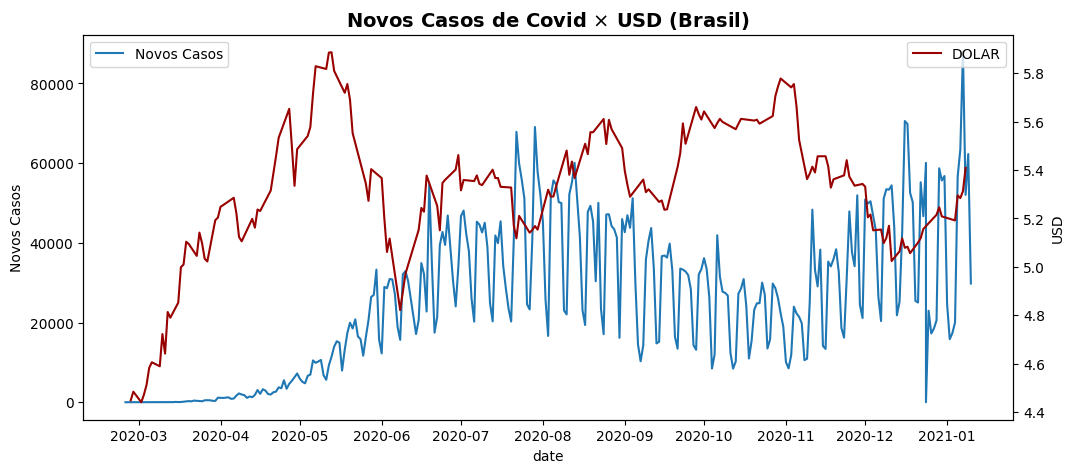

In [11]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(corona_Brasil.data, corona_Brasil.casosNovos, label='Novos Casos')

ax.set_title('Novos Casos de Covid $\\times$ USD (Brasil)', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Novos Casos")
ax.legend()

ax2 = ax.twinx()
ax2.plot(bovespa.data, bovespa.DOLAR, label='DOLAR',color=(0.6, 0.0, 0.0))

ax2.set_ylabel("USD")
ax2.legend()

plt.show()

# Exercício 2

Faça um gráfico o mais similar possível do gráfico abaixo.

Dicas:

1. Para a correlação faça o join dos dados por data.
2. Empregue:
```
bovespa.DOLAR.rolling(30).mean()
corona_Brasil.casosNovos.rolling(30).mean()
```
Para gerar as séries médias.


In [12]:
corona_Brasil = corona_Brasil.set_index('data')
bovespa = bovespa.set_index('data')


In [13]:
merged_df = pd.merge(corona_Brasil[['casosNovos']], bovespa[['DOLAR']], left_index=True, right_index=True, how='inner')
merged_df


,casosNovos,DOLAR
data,,
2020-02-27,0.0,4.4491
2020-02-28,0.0,4.4848
2020-03-02,0.0,4.4413
2020-03-03,0.0,4.4724
2020-03-04,1.0,4.5132
...,...,...
2021-01-04,20006.0,5.1919
2021-01-05,56648.0,5.2953
2021-01-06,63430.0,5.2841


In [14]:
np.round(np.array(merged_df.corr())[0,1],2)

np.float64(0.16)

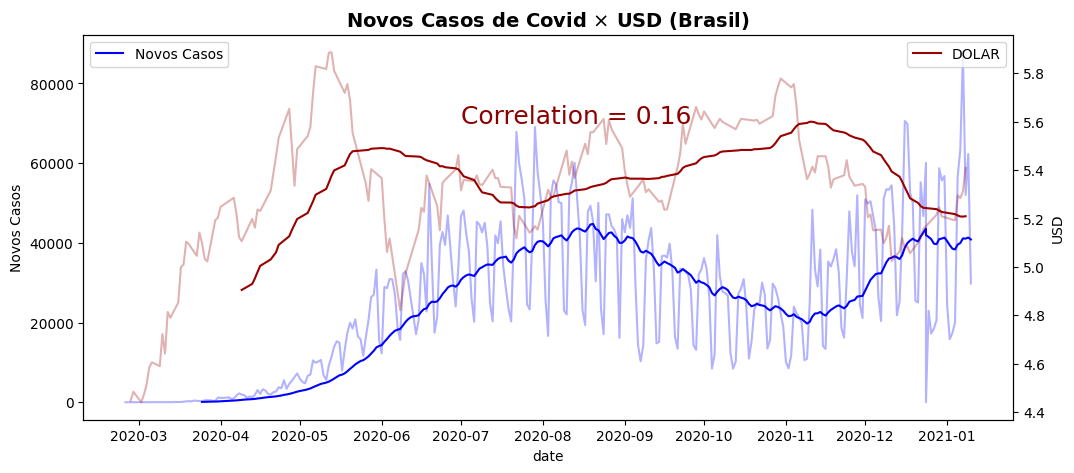

In [15]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(corona_Brasil.index, corona_Brasil.casosNovos, label='',alpha=0.3, color='b')
ax.plot(corona_Brasil.casosNovos.rolling(30).mean(), label='Novos Casos',alpha=1, color='b')

ax.set_title('Novos Casos de Covid $\\times$ USD (Brasil)', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Novos Casos")
ax.legend()

ax2 = ax.twinx()
ax2.plot(bovespa.index, bovespa.DOLAR, label='',alpha=0.3,color=(0.6, 0.0, 0.0))
ax2.plot(bovespa.DOLAR.rolling(30).mean(), label='DOLAR',alpha=1,color=(0.6, 0.0, 0.0))

ax2.set_ylabel("USD")
ax2.legend()

date_to_annotate = pd.to_datetime('2020-07-01')
ax.text(date_to_annotate,70000,'Correlation = ' + str(np.round(np.array(merged_df.corr())[0,1],2)),fontsize=18,color='darkred')

plt.show()